In [1]:
import pandas as pd 
# importing pandas to load the data

In [2]:
df = pd.read_csv('spotify_long_tracks_2014_2024.csv.xls')

In [3]:
print(df) #load the data 

                         ID  \
0    026O2YP2wRl9h3Ht9ClZST   
1    0DXnjJxJBvgMvBjG6Jug7I   
2    6BFn78qFy9bRqKHTMfhnNv   
3    1dNwMOMtq3yflXibbqgLku   
4    290gfei8moWWSh8qTVkTT3   
..                      ...   
811  0OYbUI94jw0vLQeAmKKZ53   
812  4Wmjr8wNvU4O3tj3CXRmkE   
813  465EdPfedCDmofyICPGmiF   
814  2NNBTCfzAgyolaaZNNzD4O   
815  5dB5tmSZ4hoUY36tSkPoxt   

                                                  Name  Duration (Minutes)  \
0    Steady Rain in a Forest with Light Background ...                 100   
1                                     Soundarya Lahari                  66   
2                    Waves of Abundance & Fullfillment                  60   
3    Mosquito Solution Anti Teen Street Party or Te...                  45   
4    Ibiza Sunset Tibetan Singing Bowl Sessions 7 (...                  44   
..                                                 ...                 ...   
811                                            Keep On                   5   
812

In [4]:
print(df.head()) #view the data 

                       ID                                               Name  \
0  026O2YP2wRl9h3Ht9ClZST  Steady Rain in a Forest with Light Background ...   
1  0DXnjJxJBvgMvBjG6Jug7I                                   Soundarya Lahari   
2  6BFn78qFy9bRqKHTMfhnNv                  Waves of Abundance & Fullfillment   
3  1dNwMOMtq3yflXibbqgLku  Mosquito Solution Anti Teen Street Party or Te...   
4  290gfei8moWWSh8qTVkTT3  Ibiza Sunset Tibetan Singing Bowl Sessions 7 (...   

   Duration (Minutes)                Artists  
0                 100          Nature Sounds  
1                  66       Mambalam Sisters  
2                  60         Zen Life Relax  
3                  45    Device Sound Effect  
4                  44  Tibetan Singing Bowls  


In [5]:
print(df.info()) #pull info on the data to evaluate which visulaizations is most needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  816 non-null    object
 1   Name                816 non-null    object
 2   Duration (Minutes)  816 non-null    int64 
 3   Artists             816 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.6+ KB
None


In [6]:
print(df.describe())

       Duration (Minutes)
count          816.000000
mean             6.980392
std              5.907642
min              5.000000
25%              5.000000
50%              6.000000
75%              7.000000
max            100.000000


In [7]:
print(df.isnull().sum())

ID                    0
Name                  0
Duration (Minutes)    0
Artists               0
dtype: int64


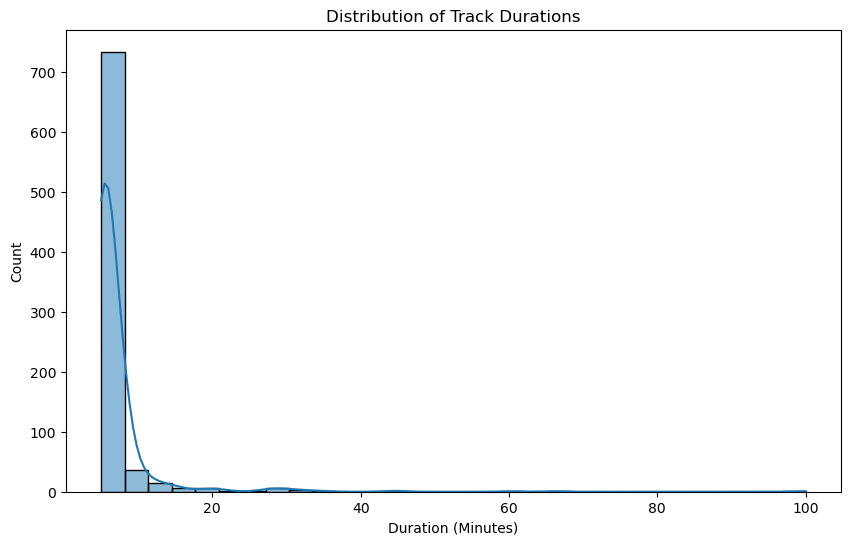

In [8]:
# histogram of track duratons, showing frequency in lengths
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Duration (Minutes)', bins=30, kde=True)
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()

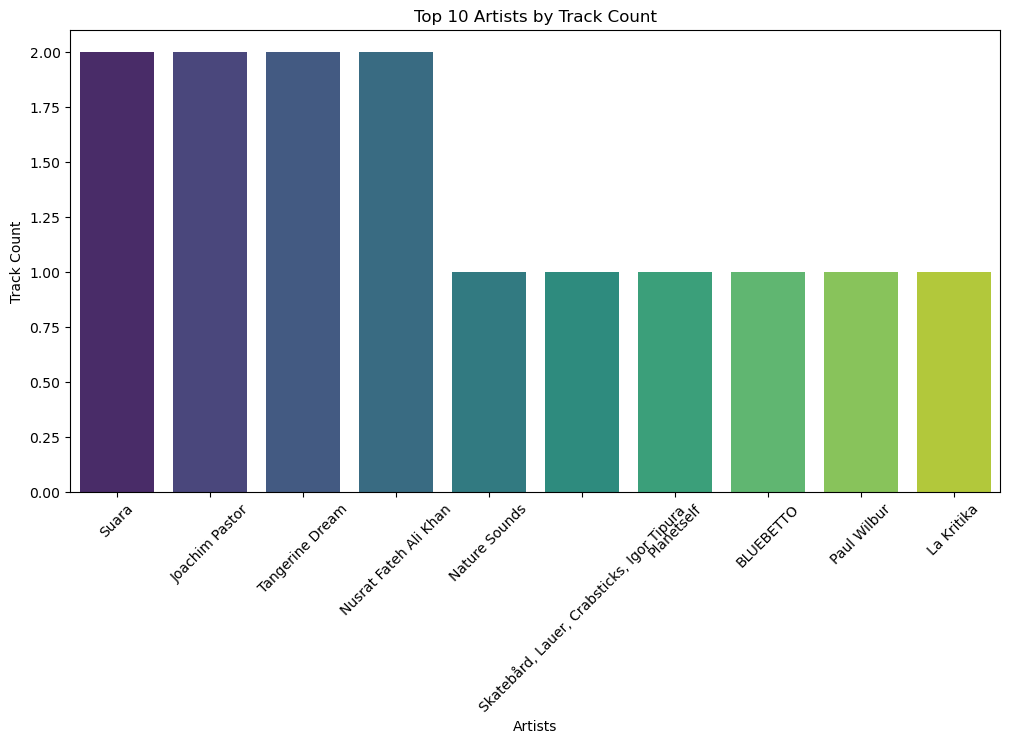

In [9]:
# Bar chart showing top 10 artsist in the data set. 
top_artists = df['Artists'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.title('Top 10 Artists by Track Count')
plt.xlabel('Artists')
plt.ylabel('Track Count')
plt.xticks(rotation=45)
plt.show()

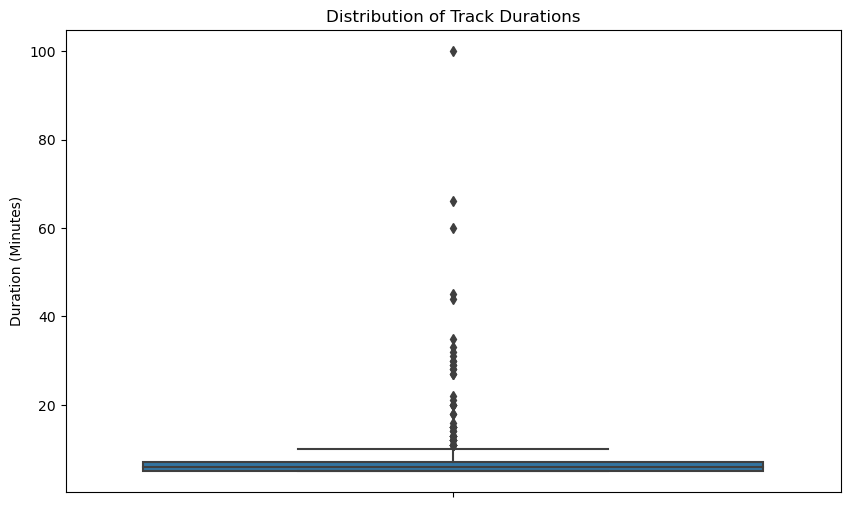

In [11]:
# box plot shpwing track distibutions as well, highlighting the median
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Duration (Minutes)')
plt.title('Distribution of Track Durations')
plt.ylabel('Duration (Minutes)')
plt.show()

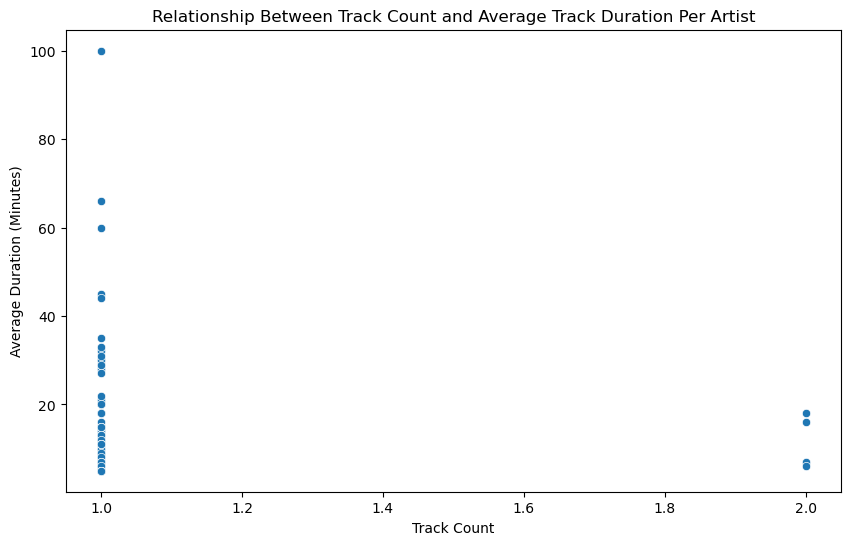

In [13]:
#bivariate plot, shows the relationship between track duration and the number or tracks per artist 
artist_stats = df.groupby('Artists').agg({'ID': 'count', 'Duration (Minutes)': 'mean'}).reset_index()
artist_stats.columns = ['Artists', 'Track Count', 'Average Duration (Minutes)']


plt.figure(figsize=(10, 6))
sns.scatterplot(data=artist_stats, x='Track Count', y='Average Duration (Minutes)')
plt.title('Relationship Between Track Count and Average Track Duration Per Artist')
plt.xlabel('Track Count')
plt.ylabel('Average Duration (Minutes)')
plt.show()


# Summary 
The data indicates a diverse collection of tracks, with significant variability in track durations. Most tracks are on the shorter side, with a median duration below 10 minutes, but there are notable exceptions with much longer durations. This diversity reflects a broad spectrum of listening experiences, from short songs to lengthy ambient or instrumental pieces.

Regarding the artists, the data suggests that productivity (in terms of track count) does not necessarily correlate with the average duration of tracks. Artists vary widely in their output, producing both many short tracks and fewer longer ones without a clear, consistent pattern. This diversity among artists highlights the varied creative approaches within the dataset, ranging from artists specializing in brief, concise tracks to those who create expansive, elongated compositions.

The box plot effectively summarized the distribution of track durations, highlighting the central tendency, variability, and outliers. This visualization made it clear that while most tracks are of shorter duration, there's a significant range in track lengths.
The scatter plot provided insights into the relationship between an artist's productivity and the average duration of their tracks. By not showing a strong correlation, it supported the conclusion that artists' approaches to track length vary widely, regardless of how many tracks they produce.